<a href="https://colab.research.google.com/github/anirudhssundar/optimal_control/blob/main/6553_HW_10b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def get_p(x,dt):
  # p = [x[-1]]
  p = [0]
  x_rev = x[::-1]
  for i in range(1,len(x)):
    # p_t_minus_dt = p[-1]*(1-dt) + 2*x_rev[i]*dt
    p_t_minus_dt = p[-1] - dt*(p[-1]/(2*np.sqrt(x_rev[i])) - (x_rev[i]-2.5))
    p.append(p_t_minus_dt)
  return np.array(p[::-1])

In [9]:
def get_u(t1,t2,dt):
  t = np.arange(1000)
  dynu = []
  for i,foo in enumerate(t):
    if foo*dt < t1:
      dynu.append(2)
    elif (foo*dt>=t1) and (foo*dt<t2):
      dynu.append(1)
    else:
      dynu.append(2)
  return dynu

In [10]:
def J(x,r,dt):
  val = 0.5*np.sum((x - r)**2)*dt
  return val

In [11]:
def dyn_u(t1,t2,dt):
  dynu = get_u(t1,t2,dt)
  dynx = get_trajectory(dynu,1.5,dt)
  cost = J(dynx,2.5,dt)
  return cost

In [12]:
def get_trajectory(u,x_0,dt):
  x = x_0
  x_fin = []
  x_fin.append(x_0)
  for i in u:
    x_dot = -np.sqrt(x) + i
    x_new = x_dot*dt + x
    x_fin.append(x_new)
    x = x_new 
  return np.array(x_fin)

t changed 6.9324329078496305
t changed 5.984044545510011
t changed 5.8266773842501625
t changed 5.826674934098675
t changed 5.826672483947188
t changed 5.826670033795701
t changed 5.826667583644214
t changed 5.826665133492727
t changed 8.999997549848512
t changed 8.999995099697024
t changed 8.999992649545536
t changed 8.999990199394048
t changed 8.99998774924256
t changed 8.999985299091072
t changed 8.999982848939585
t changed 8.999980398788097
5.826665133492727
8.999980398788097
1.6753495792204849


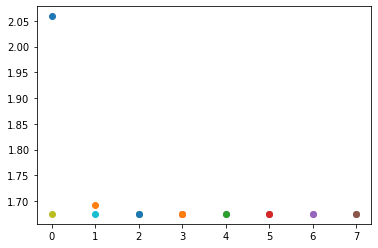

In [19]:
x_0 = 1.5
# t = 10
r = 2.5
t = np.arange(1000)
dt = 0.01
alpha=0.2
beta=0.5
tol = 1e-4

# for split in np.arange(5,7):
t_1 = 3
t_2 = 9

u = get_u(t_1,t_2,dt)
x = np.array(get_trajectory(u,x_0,dt))
p = get_p(x,dt)
iters = 0

# ARMIJO STUFF
if abs(p[int(t_1*dt)])<tol:
  print("done")
else:
  while abs(p[int(t_1*dt)])>tol:
    if iters==8:
      break
    k=0
    while dyn_u(t_1 - (beta**k)*p[int(t_1*dt)],t_2,dt) > dyn_u(t_1,t_2,dt) -alpha*(beta**k)*(p[int(t_1*dt)]**2):
      k+=1
      # print(k)
      # print(dyn_u(t_1 - (beta**k)*p[int(t_1*dt)],dt))

      if k==10:
        break
    lambd = -(beta**k)/(beta**2)
    # beta = beta*2
    t_1 = t_1 + lambd*p[int(t_1*dt)]
    plt.scatter(iters, dyn_u(t_1,t_2,dt))
    print("t changed",t_1)

    u_new = get_u(t_1,t_2,dt)
    x_new = get_trajectory(u_new, x_0,dt)
    p = get_p(x_new,dt)
    iters+=1


alpha=0.2
beta=0.5
iters=0
if abs(p[int(t_2*dt)])<tol:
  print("done")
else:
  while abs(p[int(t_2*dt)])>tol:
    if iters==8:
      break
    k=0
    while dyn_u(t_1,t_2 - (beta**k)*p[int(t_2*dt)],dt) > dyn_u(t_1,t_2,dt) -alpha*(beta**k)*(p[int(t_2*dt)]**2):
      k+=1
      # print(k)
      # print(dyn_u(t_1 - (beta**k)*p[int(t_1*dt)],dt))

      if k==10:
        break
    lambd = -(beta**k)/(beta**2)
    # beta = beta*2
    t_2 = t_2 + lambd*p[int(t_2*dt)]
    plt.scatter(iters, dyn_u(t_1,t_2,dt))
    print("t changed",t_2)

    u_new = get_u(t_1,t_2,dt)
    x_new = get_trajectory(u_new, x_0,dt)
    p = get_p(x_new,dt)
    iters+=1
#  J = 0.5*np.sum((x - r)**2)*dt
  # print(split, J)
print(t_1)
print(t_2)
fin_u = get_u(t_1,t_2,dt)
fin_x = np.array(get_trajectory(fin_u,x_0,dt))
fin_p = get_p(fin_x,dt)
fin_cost = J(fin_x, r, dt)
print(fin_cost)

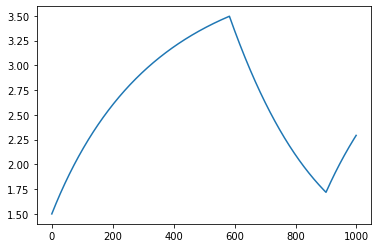

In [20]:
plt.plot(t,fin_x[:-1])

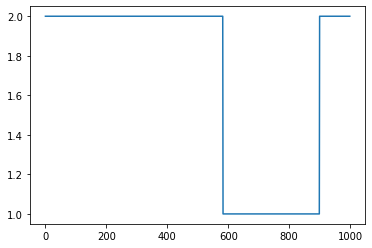

In [21]:
plt.plot(fin_u)

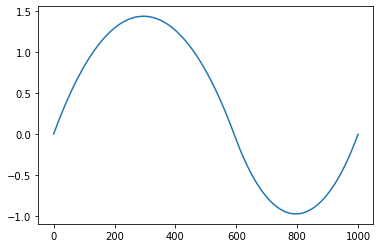

In [ ]:
plt.plot(fin_p)

t changed 6.9324329078496305
t changed 8.999073839489903
t changed 5.984044545510011
t changed 8.841706678230054
t changed 5.798635467620442
t changed 8.841706783991139
5.798635467620442
8.841706783991139
1.611404062284186


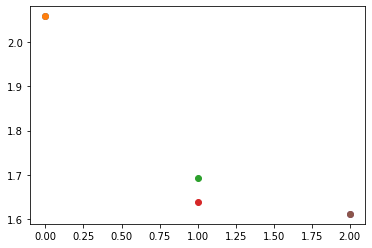

In [24]:
x_0 = 1.5
# t = 10
r = 2.5
t = np.arange(1000)
dt = 0.01
alpha1=0.2
beta1=0.5

alpha2=0.2
beta2=0.5

tol = 1e-4

# for split in np.arange(5,7):
t_1 = 3
t_2 = 9

u = get_u(t_1,t_2,dt)
x = np.array(get_trajectory(u,x_0,dt))
p = get_p(x,dt)
iters = 0
iters2 = 0

# ARMIJO STUFF
if abs(p[int(t_1*dt)])<tol:
  print("done")
else:
  while (abs(p[int(t_1*dt)])>tol) and (abs(p[int(t_2*dt)])>tol):
    if iters==8:
      break
    k=0
    while dyn_u(t_1 - (beta1**k)*p[int(t_1*dt)],t_2,dt) > dyn_u(t_1,t_2,dt) -alpha1*(beta1**k)*(p[int(t_1*dt)]**2):
      k+=1
      # print(k)
      # print(dyn_u(t_1 - (beta**k)*p[int(t_1*dt)],dt))

      if k==10:
        break
    lambd1 = -(beta1**k)/(beta1**2)
    # beta = beta*2
    t_1 = t_1 + lambd1*p[int(t_1*dt)]
    plt.scatter(iters, dyn_u(t_1,t_2,dt))
    print("t changed",t_1)

    u_new = get_u(t_1,t_2,dt)
    x_new = get_trajectory(u_new, x_0,dt)
    p = get_p(x_new,dt)
    # iters+=1

    k=0
    while dyn_u(t_1,t_2 - (beta2**k)*p[int(t_2*dt)],dt) > dyn_u(t_1,t_2,dt) -alpha2*(beta2**k)*(p[int(t_2*dt)]**2):
      k+=1
      # print(k)
      # print(dyn_u(t_1 - (beta**k)*p[int(t_1*dt)],dt))

      if k==10:
        break
    lambd2 = -(beta2**k)/(beta2**2)
    # beta = beta*2
    t_2 = t_2 + lambd2*p[int(t_2*dt)]
    plt.scatter(iters, dyn_u(t_1,t_2,dt))
    print("t changed",t_2)

    u_new = get_u(t_1,t_2,dt)
    x_new = get_trajectory(u_new, x_0,dt)
    p = get_p(x_new,dt)
    iters+=1


print(t_1)
print(t_2)
fin_u = get_u(t_1,t_2,dt)
fin_x = np.array(get_trajectory(fin_u,x_0,dt))
fin_p = get_p(fin_x,dt)
fin_cost = J(fin_x, r, dt)
print(fin_cost)

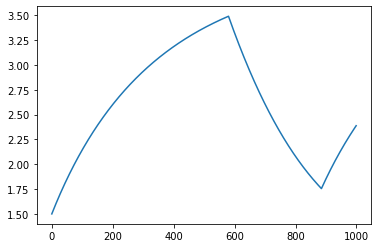

In [25]:
plt.plot(t,fin_x[:-1])

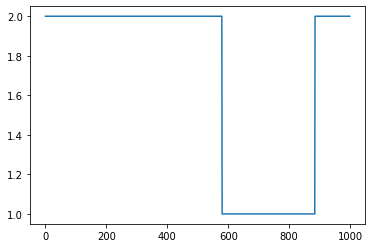

In [27]:
plt.plot(t,fin_u)

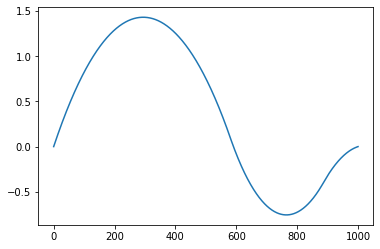

In [29]:
plt.plot(fin_p)

In [1]:
(2-np.sqrt(2.5))

NameError: ignored